In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [203]:
import matplotlib.pyplot as plt

In [204]:
data=pd.read_csv(r"C:\Users\csrth\Downloads\Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv")

In [205]:
data.head(15)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN
5,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,129005.0,133088.0,NaN
6,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,138503.0,141868.0,NaN
7,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,121119.0,123018.0,NaN
8,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,12.0,12.0,NaN
9,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,531174.0,545947.0,NaN


In [206]:
data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB


In [208]:
data.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,608580.000000,558900.000000,4.375510e+05,4.434230e+05
mean,2021.408163,6.200000,1.201179e+02,1.293348e+02
std,1.086436,3.350625,2.980201e+03,3.203936e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.800000e+01,1.900000e+01
max,2023.000000,12.000000,1.146242e+06,1.146242e+06


In [209]:
data['Data As Of'] = pd.to_datetime(data['Data As Of'])
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

# Converting 'Year' and 'Month' to integer (filling missing values with a placeholder -1)
data['Year'] = data['Year'].fillna(-1).astype(int)
data['Month'] = data['Month'].fillna(-1).astype(int)

# Checking for missing values in key columns and deciding on a strategy to handle them
missing_values_summary = data.isnull().sum()

missing_values_summary, data.dtypes

(Data As Of                 0
 Start Date                 0
 End Date                   0
 Group                      0
 Year                       0
 Month                      0
 State                      0
 Condition Group            0
 Condition                  0
 ICD10_codes                0
 Age Group                  0
 COVID-19 Deaths       183449
 Number of Mentions    177577
 Flag                  437551
 dtype: int64,
 Data As Of            datetime64[ns]
 Start Date            datetime64[ns]
 End Date              datetime64[ns]
 Group                         object
 Year                           int32
 Month                          int32
 State                         object
 Condition Group               object
 Condition                     object
 ICD10_codes                   object
 Age Group                     object
 COVID-19 Deaths              float64
 Number of Mentions           float64
 Flag                          object
 dtype: object)

In [210]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation only on the numerical columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])


In [211]:
data = data.drop('Flag', axis=1)

In [212]:
data['Data As Of'] = pd.to_datetime(data['Data As Of'])
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

# Converting 'Year' and 'Month' to integer (filling missing values with a placeholder -1)
data['Year'] = data['Year'].fillna(-1).astype(int)
data['Month'] = data['Month'].fillna(-1).astype(int)

# Checking for missing values in key columns and deciding on a strategy to handle them
missing_values_summary = data.isnull().sum()

missing_values_summary, data.dtypes

(Data As Of            0
 Start Date            0
 End Date              0
 Group                 0
 Year                  0
 Month                 0
 State                 0
 Condition Group       0
 Condition             0
 ICD10_codes           0
 Age Group             0
 COVID-19 Deaths       0
 Number of Mentions    0
 dtype: int64,
 Data As Of            datetime64[ns]
 Start Date            datetime64[ns]
 End Date              datetime64[ns]
 Group                         object
 Year                           int32
 Month                          int32
 State                         object
 Condition Group               object
 Condition                     object
 ICD10_codes                   object
 Age Group                     object
 COVID-19 Deaths              float64
 Number of Mentions           float64
 dtype: object)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Data As Of          621000 non-null  datetime64[ns]
 1   Start Date          621000 non-null  datetime64[ns]
 2   End Date            621000 non-null  datetime64[ns]
 3   Group               621000 non-null  object        
 4   Year                621000 non-null  int32         
 5   Month               621000 non-null  int32         
 6   State               621000 non-null  object        
 7   Condition Group     621000 non-null  object        
 8   Condition           621000 non-null  object        
 9   ICD10_codes         621000 non-null  object        
 10  Age Group           621000 non-null  object        
 11  COVID-19 Deaths     621000 non-null  float64       
 12  Number of Mentions  621000 non-null  float64       
dtypes: datetime64[ns](3), float64

In [214]:
# Convert "Condition Group" column to numeric using integer encoding in the original dataframe 'data'
condition_group_mapping = {label: idx for idx, label in enumerate(data['Condition Group'].unique())}
data['Condition Group Numeric'] = data['Condition Group'].map(condition_group_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)


# Convert "Condition" column to numeric using integer encoding
age_Group_mapping = {label: idx for idx, label in enumerate(data['Age Group'].unique())}
data['Age Group Numeric'] = data['Age Group'].map(age_Group_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)

# Convert "Condition" column to numeric using integer encoding
condition_mapping = {label: idx for idx, label in enumerate(data['Condition'].unique())}
data['Condition Numeric'] = data['Condition'].map(condition_mapping)




# Create a mapping summary for the "Condition" column
condition_mapping_summary = pd.DataFrame(list(condition_mapping.items()), columns=['Condition', 'Numeric Value'])
condition_mapping_summary2 = pd.DataFrame(list(condition_group_mapping.items()), columns=['Condition Group', 'Numeric Value'])

#concatenate=pd.concat([condition_mapping_summary,condition_mapping_summary2])
condition_mapping_summary






,Condition,Numeric Value
0,Influenza and pneumonia,0
1,Chronic lower respiratory diseases,1
2,Adult respiratory distress syndrome,2
3,Respiratory failure,3
4,Respiratory arrest,4
5,Other diseases of the respiratory system,5
6,Hypertensive diseases,6
7,Ischemic heart disease,7
8,Cardiac arrest,8
9,Cardiac arrhythmia,9


In [215]:
condition_mapping_summary2

,Condition Group,Numeric Value
0,Respiratory diseases,0
1,Circulatory diseases,1
2,Sepsis,2
3,Malignant neoplasms,3
4,Diabetes,4
5,Obesity,5
6,Alzheimer disease,6
7,Vascular and unspecified dementia,7
8,Renal failure,8
9,"Intentional and unintentional injury, poisonin...",9


In [216]:
data.drop(columns=['Condition Group', 'Condition'])


,Data As Of,Start Date,End Date,Group,Year,Month,State,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Condition Group Numeric,Condition Numeric
0,2023-09-24,2020-01-01,2023-09-23,By Total,-1,-1,United States,J09-J18,0-24,1569.0,1647.0,0,0
1,2023-09-24,2020-01-01,2023-09-23,By Total,-1,-1,United States,J09-J18,25-34,5804.0,6029.0,0,0
2,2023-09-24,2020-01-01,2023-09-23,By Total,-1,-1,United States,J09-J18,35-44,15080.0,15699.0,0,0
3,2023-09-24,2020-01-01,2023-09-23,By Total,-1,-1,United States,J09-J18,45-54,37414.0,38878.0,0,0
4,2023-09-24,2020-01-01,2023-09-23,By Total,-1,-1,United States,J09-J18,55-64,82668.0,85708.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620995,2023-09-24,2023-05-01,2023-05-31,By Month,2023,5,Puerto Rico,U071,All Ages,67.0,67.0,11,22
620996,2023-09-24,2023-06-01,2023-06-30,By Month,2023,6,Puerto Rico,U071,All Ages,122.0,122.0,11,22
620997,2023-09-24,2023-07-01,2023-07-31,By Month,2023,7,Puerto Rico,U071,All Ages,114.0,114.0,11,22
620998,2023-09-24,2023-08-01,2023-08-31,By Month,2023,8,Puerto Rico,U071,All Ages,78.0,78.0,11,22


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Data As Of               621000 non-null  datetime64[ns]
 1   Start Date               621000 non-null  datetime64[ns]
 2   End Date                 621000 non-null  datetime64[ns]
 3   Group                    621000 non-null  object        
 4   Year                     621000 non-null  int32         
 5   Month                    621000 non-null  int32         
 6   State                    621000 non-null  object        
 7   Condition Group          621000 non-null  object        
 8   Condition                621000 non-null  object        
 9   ICD10_codes              621000 non-null  object        
 10  Age Group                621000 non-null  object        
 11  COVID-19 Deaths          621000 non-null  float64       
 12  Number of Mentio

In [218]:
data.to_csv('C:/Users/csrth/Downloads/modified_dataset.csv', index=False)

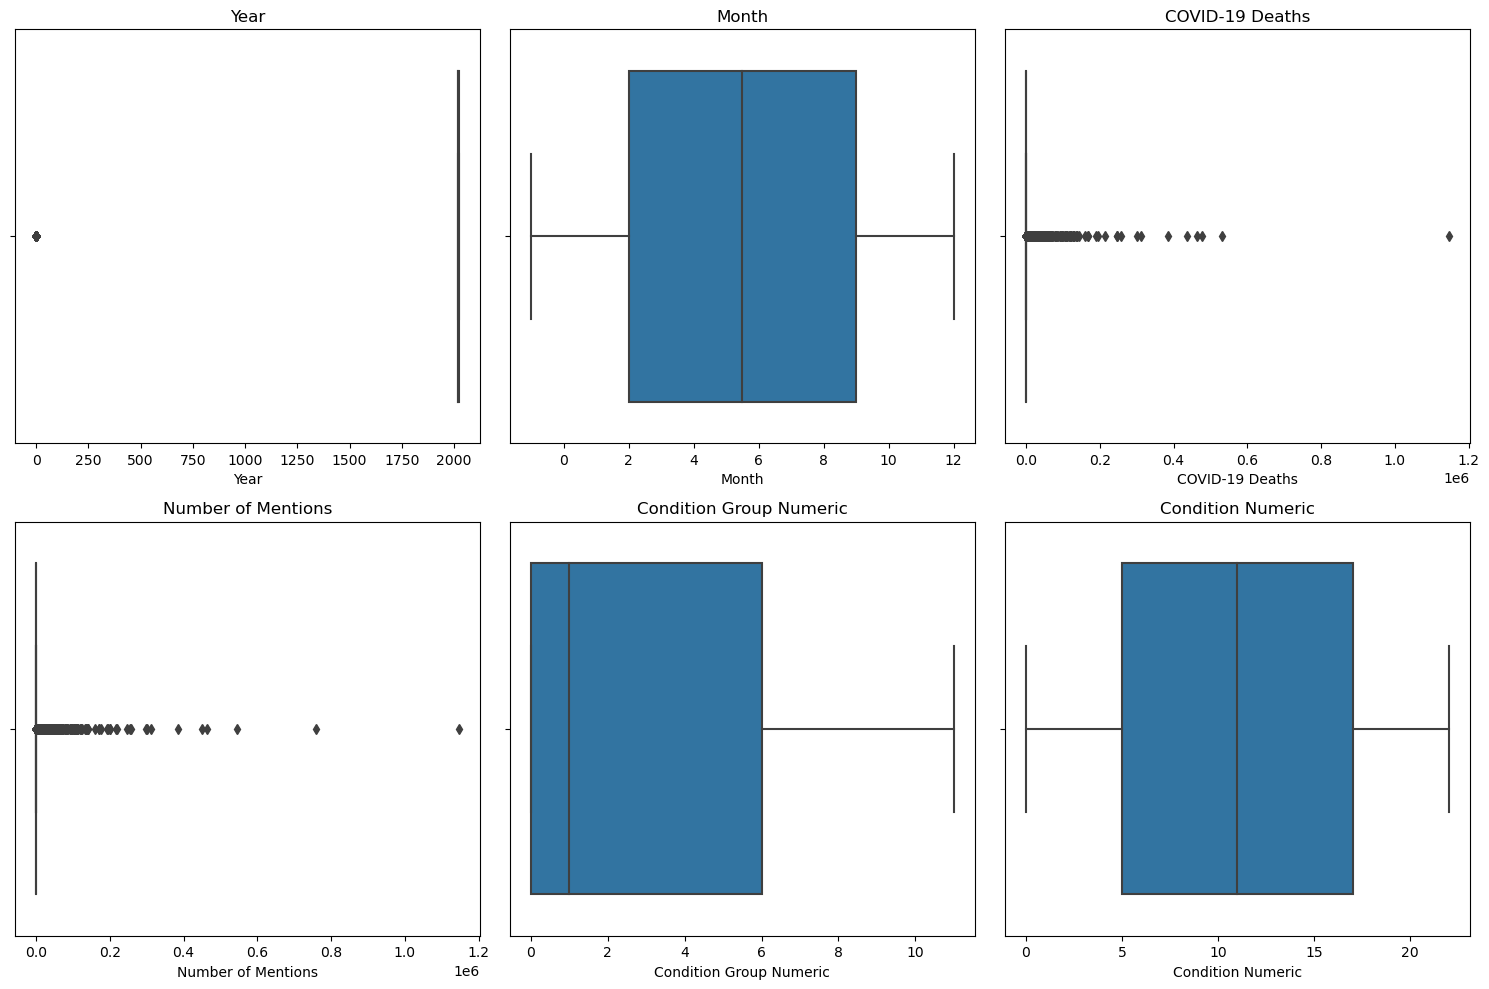

In [219]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = data.select_dtypes(include=['int', 'float',]).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Segmentation analysis

In [220]:
# Segmentation Analysis

# 1. Analysis by Age Group
age_group_analysis = data.groupby('Age Group')['COVID-19 Deaths'].sum().sort_values(ascending=False)
age_group_analysis






Age Group
All Ages      2.837612e+07
75-84         9.940426e+06
85+           9.745218e+06
65-74         9.041127e+06
55-64         6.618921e+06
45-54         4.219139e+06
35-44         2.776477e+06
25-34         1.824655e+06
0-24          1.135054e+06
Not stated    2.828343e+04
Name: COVID-19 Deaths, dtype: float64

In [221]:
# 2. Analysis by State
state_analysis = data.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False)
state_analysis



State
United States           2.650162e+07
California              3.066721e+06
Texas                   2.774292e+06
Florida                 2.238076e+06
Pennsylvania            1.543301e+06
Ohio                    1.445552e+06
New York                1.301173e+06
Illinois                1.253914e+06
Georgia                 1.209177e+06
New Jersey              1.207782e+06
Michigan                1.151883e+06
North Carolina          1.144505e+06
New York City           1.140615e+06
Arizona                 1.106860e+06
Tennessee               1.070596e+06
Indiana                 1.027995e+06
South Carolina          9.046377e+05
Kentucky                8.997079e+05
Missouri                8.980806e+05
Alabama                 8.839835e+05
Massachusetts           8.720911e+05
Oklahoma                8.713498e+05
Virginia                8.653147e+05
Maryland                8.400676e+05
Louisiana               8.325483e+05
Wisconsin               8.145353e+05
Colorado                8.139646

In [222]:
# 3. Analysis by Condition Group
condition_group_analysis = data.groupby('Condition Group')['COVID-19 Deaths'].sum().sort_values(ascending=False)
condition_group_analysis

Condition Group
Respiratory diseases                                                         2.076279e+07
Circulatory diseases                                                         1.640556e+07
COVID-19                                                                     1.455611e+07
All other conditions and causes (residual)                                   6.464681e+06
Diabetes                                                                     3.007906e+06
Renal failure                                                                2.528530e+06
Sepsis                                                                       2.446845e+06
Malignant neoplasms                                                          1.809717e+06
Vascular and unspecified dementia                                            1.730786e+06
Obesity                                                                      1.670751e+06
Intentional and unintentional injury, poisoning, and other adverse events    1.27020

# Time series analysis

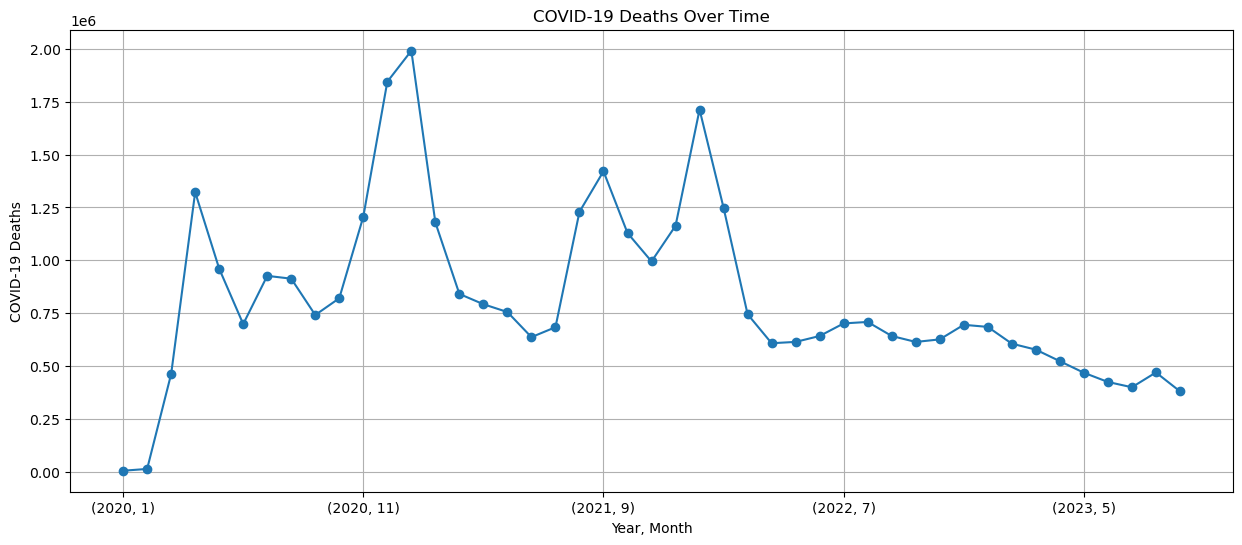

Year  Month
2022  12       695412.182668
2023  1        685500.630809
      2        606311.616111
      3        578070.111499
      4        523533.631331
      5        468936.822706
      6        425372.657853
      7        400328.133141
      8        470266.878561
      9        381207.387547
Name: COVID-19 Deaths, dtype: float64

In [223]:
# Time Series Analysis

# Grouping data by Year and Month for COVID-19 deaths
# We exclude the placeholder -1 for Year and Month
time_series_data = data[(data['Year'] != -1) & (data['Month'] != -1)]
time_series_analysis = time_series_data.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum()

# Plotting the time series data
plt.figure(figsize=(15, 6))
time_series_analysis.plot(kind='line', marker='o')
plt.title('COVID-19 Deaths Over Time')
plt.xlabel('Year, Month')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

time_series_analysis.tail(10)  # Display the last 10 entries for a closer look at recent trends


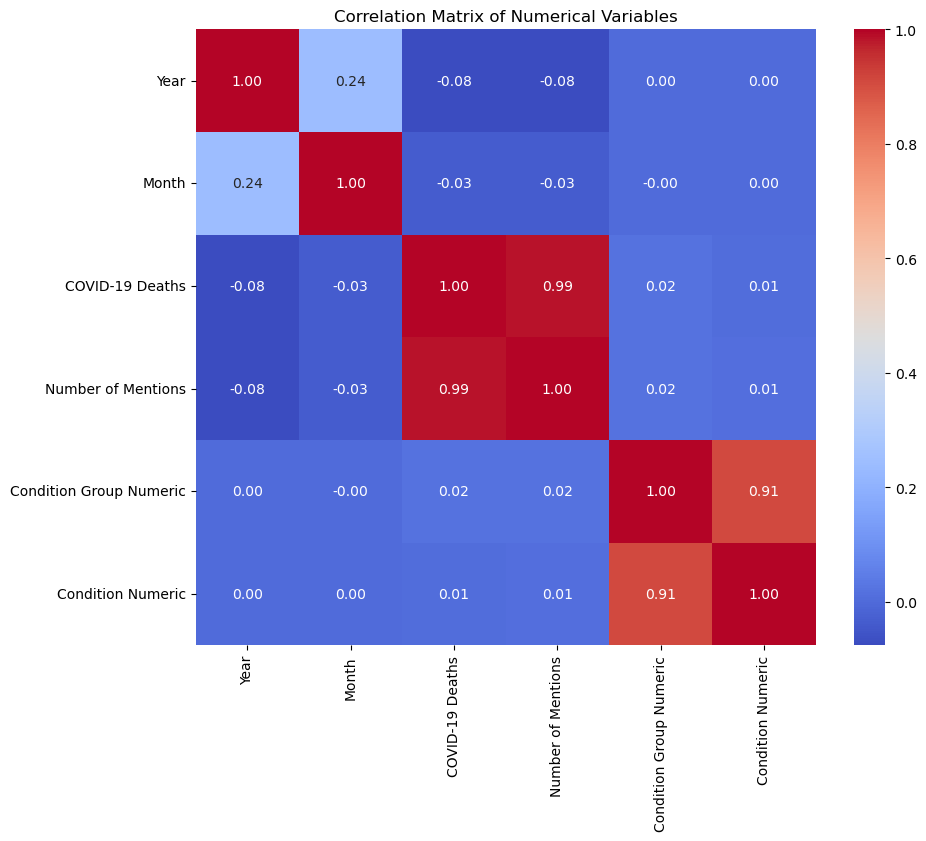

,Year,Month,COVID-19 Deaths,Number of Mentions,Condition Group Numeric,Condition Numeric
Year,1.000000e+00,2.404281e-01,-0.075589,-0.076138,4.367724e-16,2.721433e-15
Month,2.404281e-01,1.000000e+00,-0.034433,-0.034694,-4.561300e-16,3.890507e-15
COVID-19 Deaths,-7.558922e-02,-3.443306e-02,1.000000,0.986772,1.663644e-02,7.468743e-03
Number of Mentions,-7.613799e-02,-3.469444e-02,0.986772,1.000000,1.926509e-02,9.838109e-03
Condition Group Numeric,4.367724e-16,-4.561300e-16,0.016636,0.019265,1.000000e+00,9.116887e-01
Condition Numeric,2.721433e-15,3.890507e-15,0.007469,0.009838,9.116887e-01,1.000000e+00


In [224]:
# Correlation Analysis
# Selecting only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int32','int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

correlation_matrix



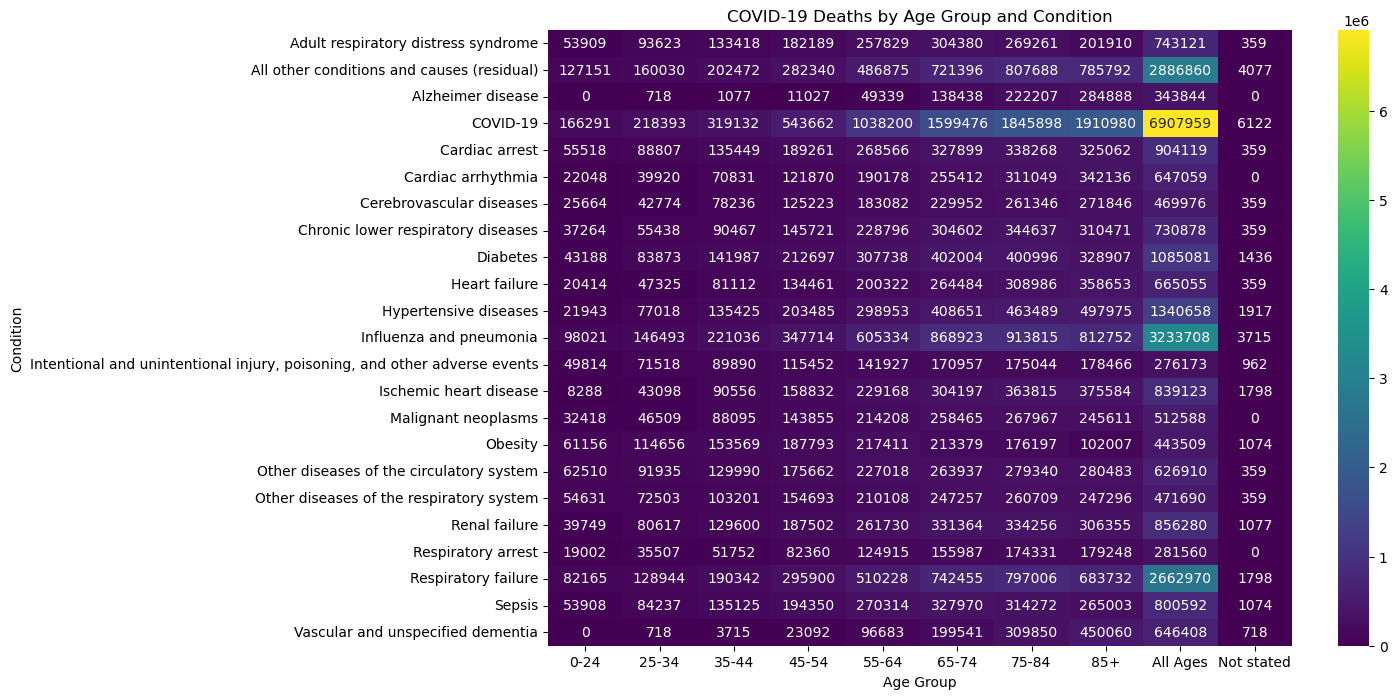

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing the data for the heatmap
heatmap_data = data.pivot_table(index='Condition', columns='Age Group', values='COVID-19 Deaths', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.title('COVID-19 Deaths by Age Group and Condition')
plt.ylabel('Condition')
plt.xlabel('Age Group')
plt.show()
